# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [2]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Now let's hack the rotated CAPTCHA!

[1.25944617e+06 3.20532406e+01]
[[ 0.55674281 -0.83068493]
 [-0.83068493 -0.55674281]]


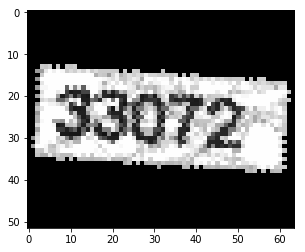

In [4]:
from hack_pca import hack_pca

# Hack different images yourself
img = hack_pca('1.gif')

plt.imshow(img)

[1.68714108e+06 2.60981051e+01]
[[ 0.74918294 -0.66236314]
 [ 0.66236314  0.74918294]]


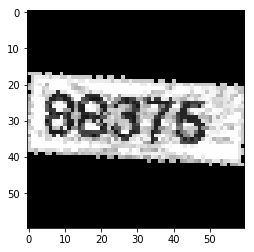

In [10]:
from hack_pca import hack_pca

# Hack different images yourself
img = hack_pca('4.gif')

plt.imshow(img)

## Apply PCA on face image

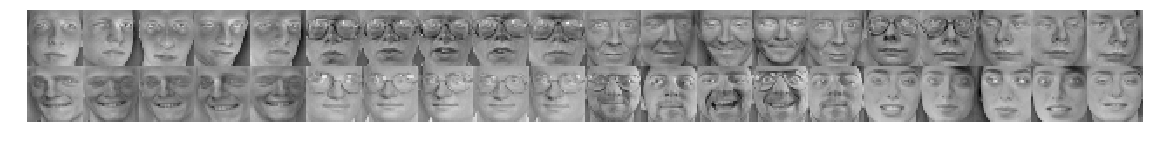

In [35]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE

# 1. Feature preprocessing
# begin answer
fea_Train_mean = np.mean(fea_Train, axis = 0)
fea_Train_std = np.std(fea_Train, axis = 0)
fea_Train = (fea_Train - fea_Train_mean)/fea_Train_std

fea_Test = (fea_Test - fea_Train_mean)/fea_Train_std

# end answer
from show_face import show_face
show_face(fea_Train)

C:\Users\Felix\Desktop\Machine Learning\hw4\ml2019fall_hw4\pca\show_face.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  = fea[i * numPerLine + j, :].reshape((faceH, faceW)).transpose()


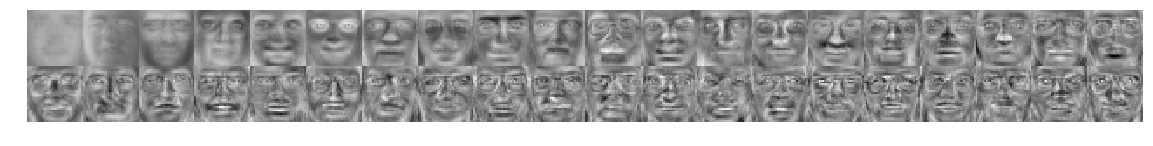

In [36]:
# 2. Run PCA
# begin answer
from pca import PCA
eigvalue, eigvector = PCA(fea_Train)

# end answer
# 3. Visualize eigenface
# begin answer
show_face(eigvector)
# end answer

Dim = 8 Error rate: 0.255
Dim = 16 Error rate: 0.17
Dim = 32 Error rate: 0.175
Dim = 64 Error rate: 0.15
Dim = 128 Error rate: 0.14


C:\Users\Felix\Desktop\Machine Learning\hw4\ml2019fall_hw4\pca\show_face.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  = fea[i * numPerLine + j, :].reshape((faceH, faceW)).transpose()


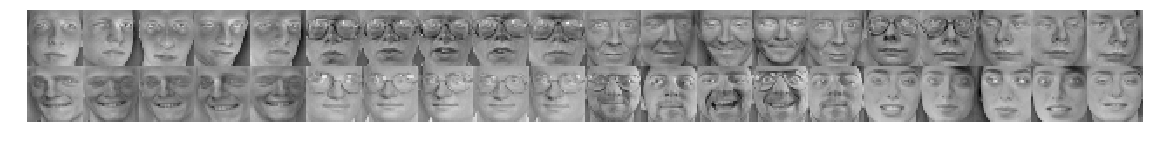

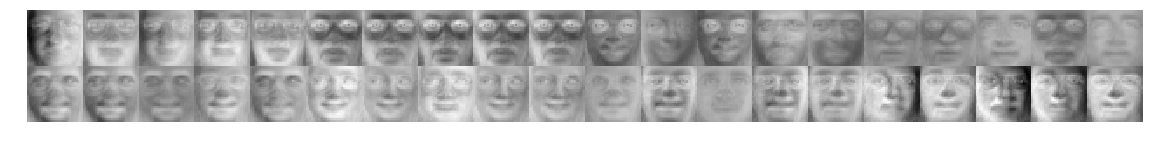

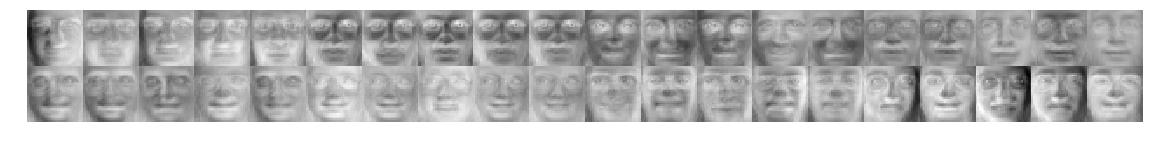

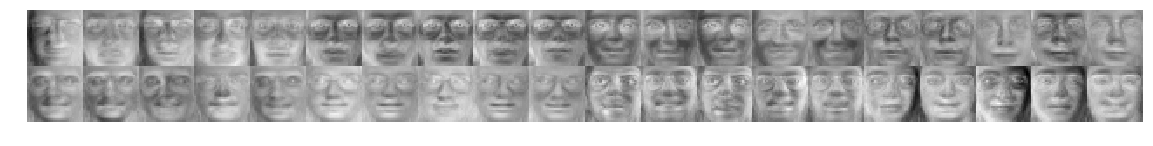

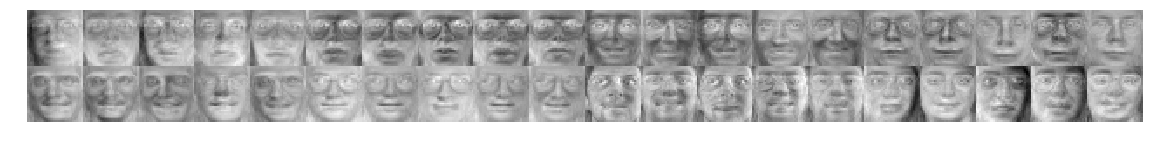

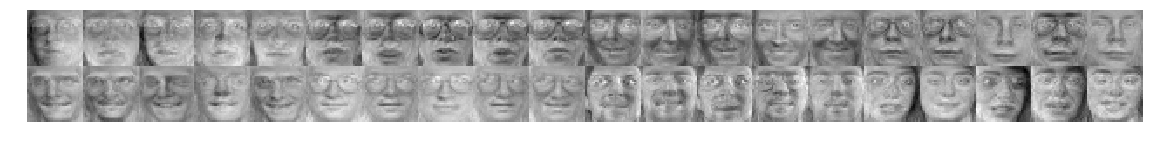

In [39]:
# 4. Project data on to low dimensional space
# begin answer

dimensions = [8, 16, 32, 64, 128]

for dim in dimensions:
    fea_Train_red = fea_Train @ eigvector[:dim,:].T
    fea_Test_red = fea_Test @ eigvector[:dim,:].T
    # end answer


    # 5. Run KNN in low dimensional space
    # begin answer
    from knn import knn
    y_pred = knn(fea_Test_red, fea_Train_red, gnd_Train, 1)
    error_rate = (y_pred[:,0] != gnd_Test).sum()/(gnd_Test.shape[0])

    print("Dim =",dim,"Error rate:",error_rate)
# end answer


# 6. Recover face images form low dimensional space, visualize them
# begin answer
show_face(fea_Train)
for dim in dimensions:
    fea_Test_rec = (fea_Test @ eigvector[:dim,:].T) @ eigvector[:dim,:]
    # end answer
    plt.figure()
    show_face(fea_Test_rec)

# end answer  

## You are encouraged to apply LDA on this dataset!

Dim = 8 Error rate: 0.27
Dim = 16 Error rate: 0.19
Dim = 32 Error rate: 0.135
Dim = 64 Error rate: 0.085
Dim = 128 Error rate: 0.06


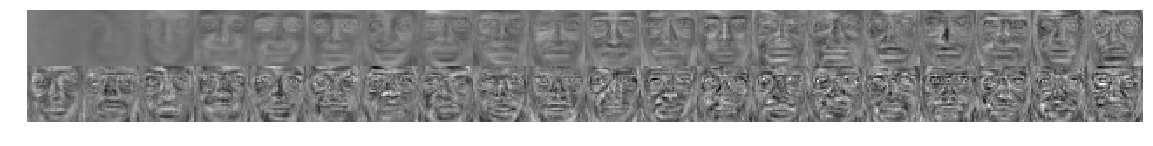

In [41]:
from LDA import LDA

# Your code here
# begin answer
eigvalue, eigvector = LDA(fea_Train, gnd_Train)
show_face(eigvector.T)


dimensions = [8, 16, 32, 64, 128]

for dim in dimensions:
    fea_Train_red = fea_Train @ eigvector[:,:dim]
    fea_Test_red = fea_Test @ eigvector[:,:dim]

    # 5. Run KNN in low dimensional space
    # begin answer
    from knn import knn
    y_pred = knn(fea_Test_red, fea_Train_red, gnd_Train, 1)
    error_rate = (y_pred[:,0] != gnd_Test).sum()/(gnd_Test.shape[0])
    print("Dim =",dim,"Error rate:",error_rate)


# end answer

In [24]:
eigvector.shape

(1024, 160)